In [23]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
)


In [24]:
# Load the dataset from the CSV file
file_path = r"C:\Users\arnav\OneDrive\Desktop\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Replace with your dataset's path
data = pd.read_csv(file_path)

# Display the first five rows to understand the data structure
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# Check for missing values
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# Convert 'TotalCharges' to numeric and coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges' by replacing them with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Verify that there are no missing values left
data.isnull().sum()


C:\Users\arnav\AppData\Local\Temp\ipykernel_17132\569052794.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
# Drop the 'customerID' column as it's not useful for modeling
data.drop('customerID', axis=1, inplace=True)


In [28]:
# Convert 'SeniorCitizen' to a categorical variable
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')


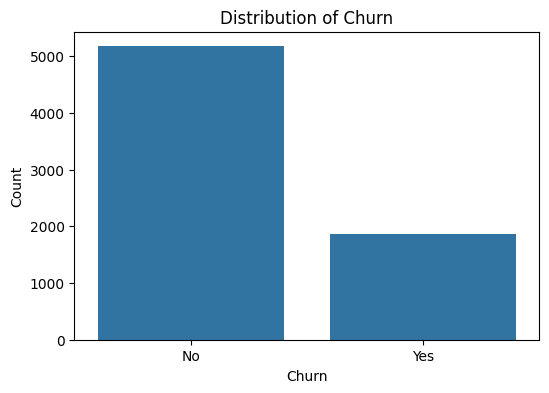

In [29]:
# Plot the distribution of the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


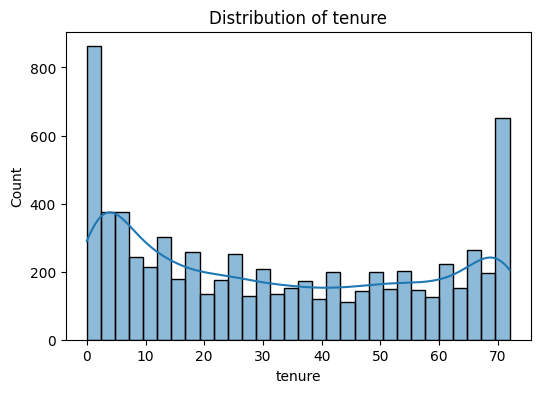

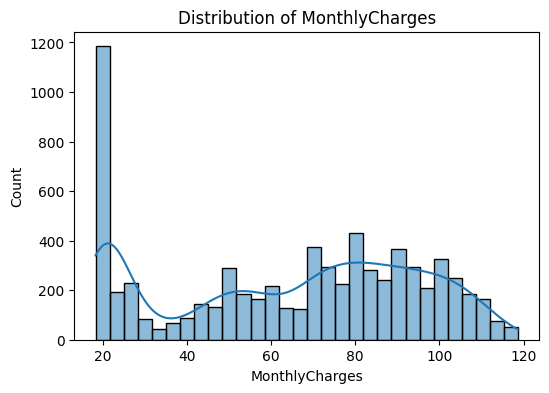

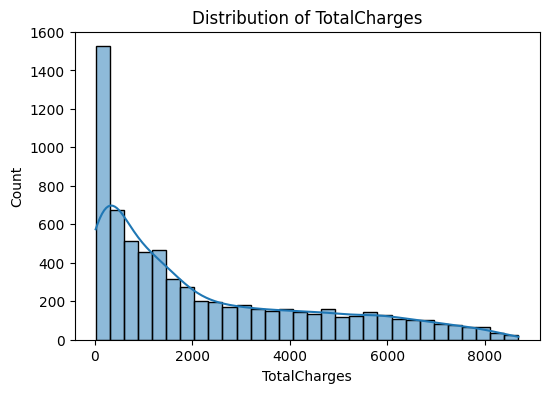

In [30]:
# Plot histograms for numerical variables
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


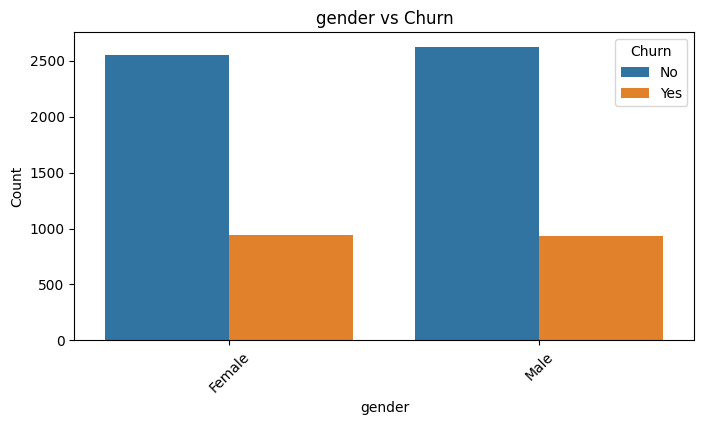

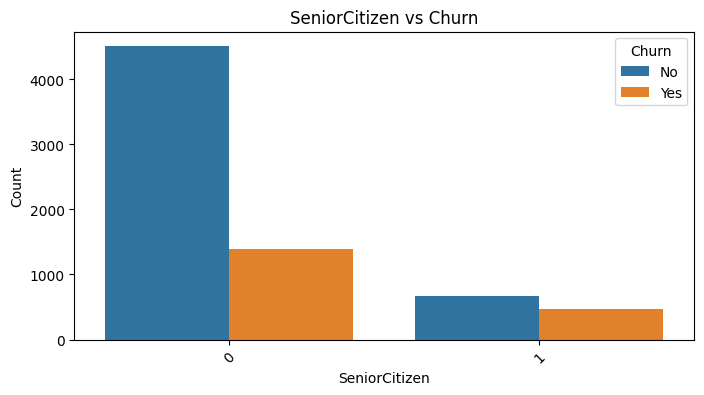

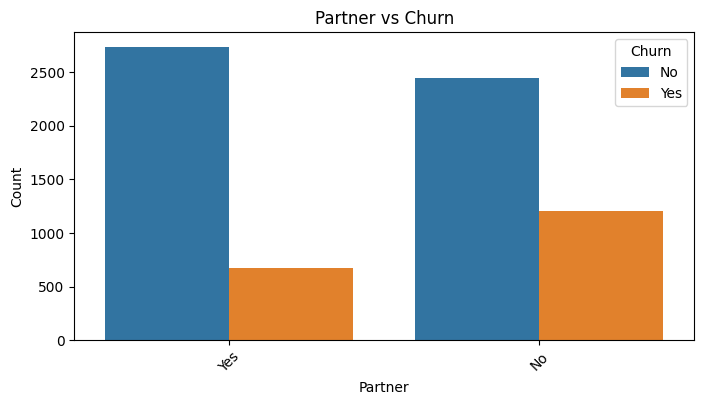

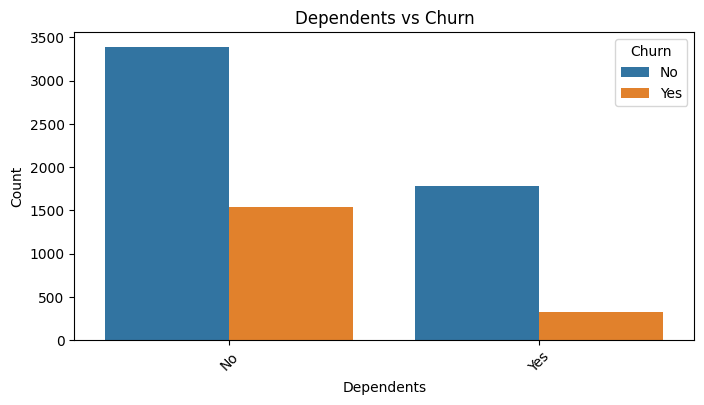

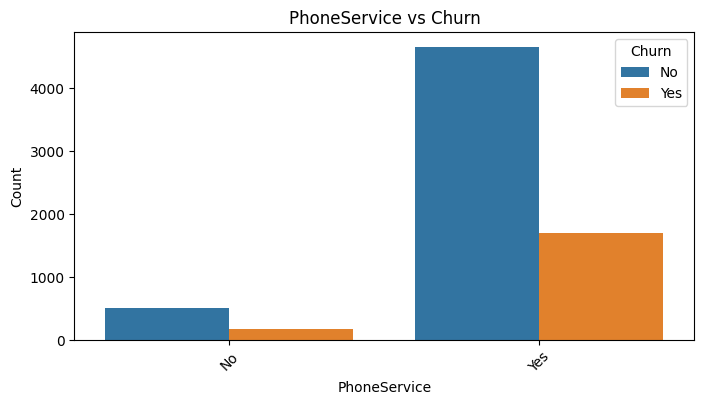

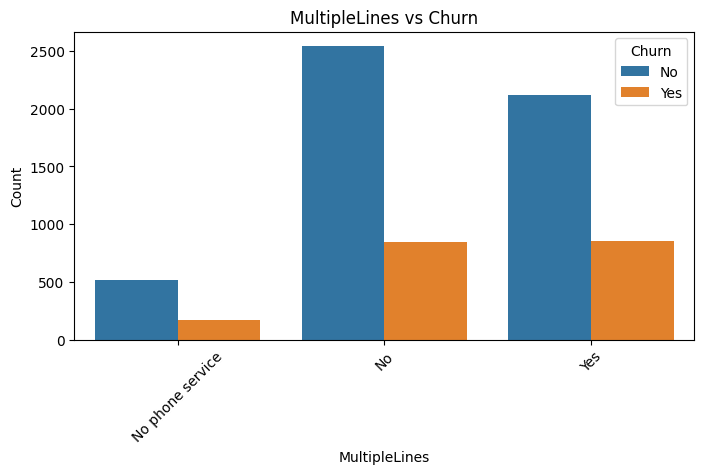

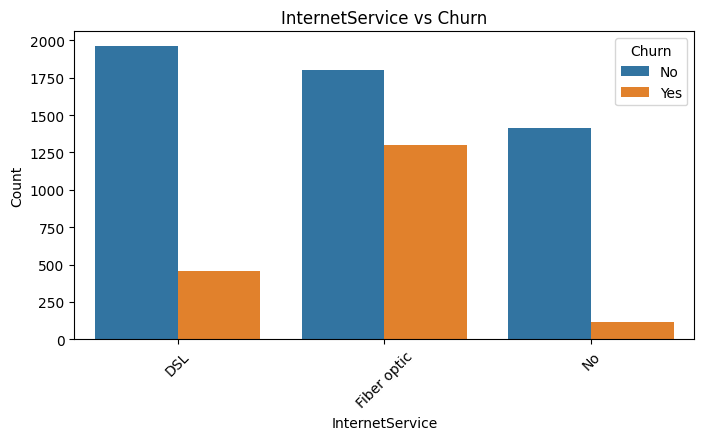

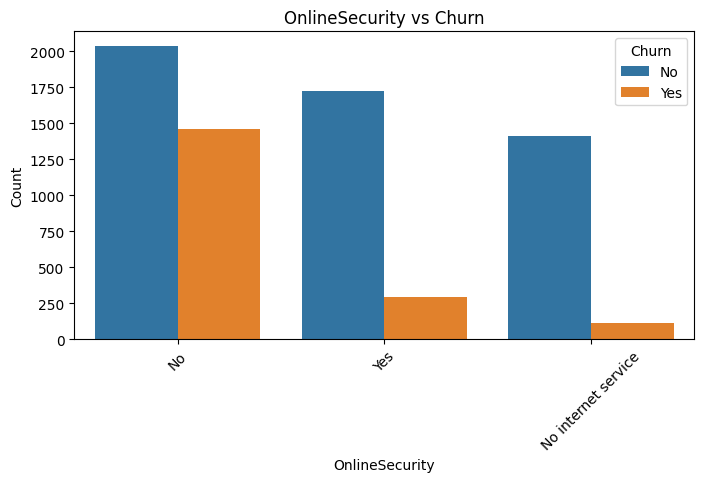

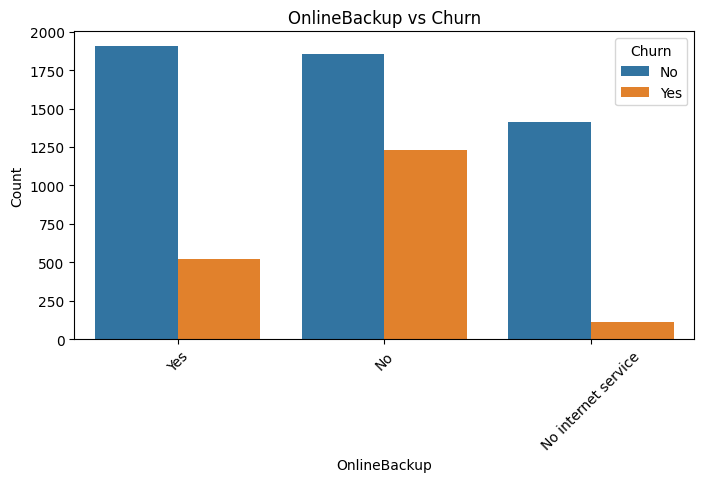

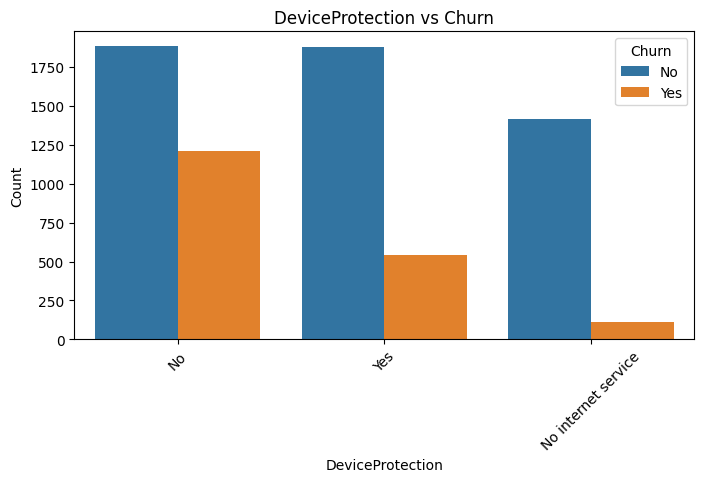

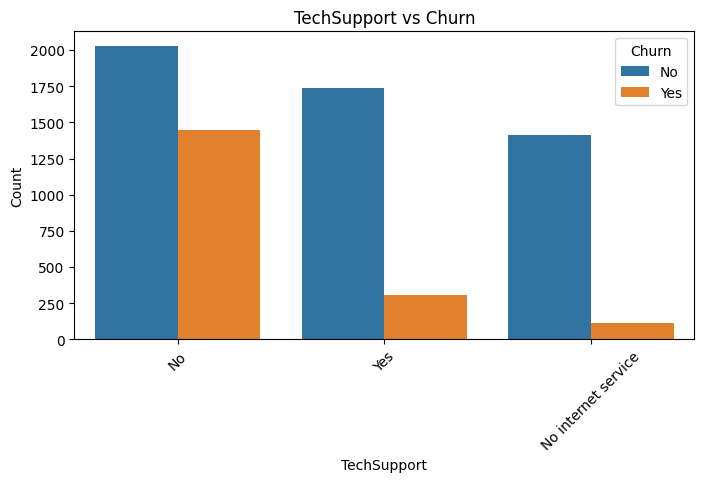

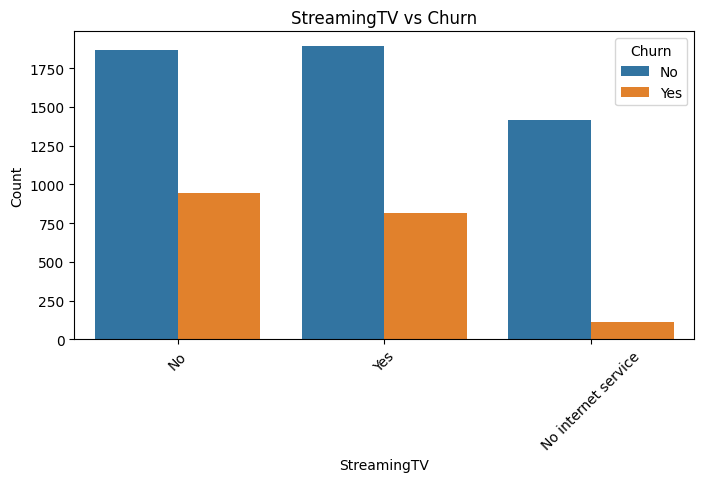

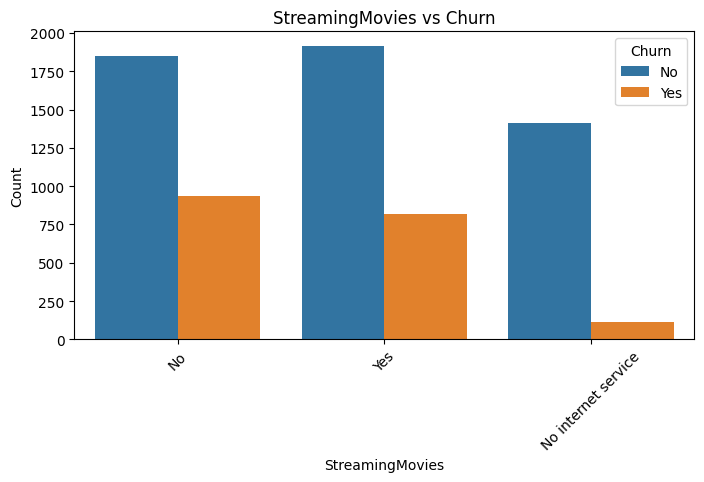

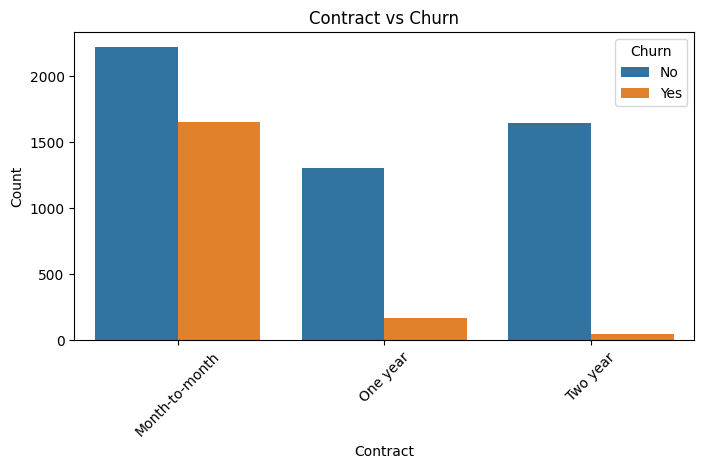

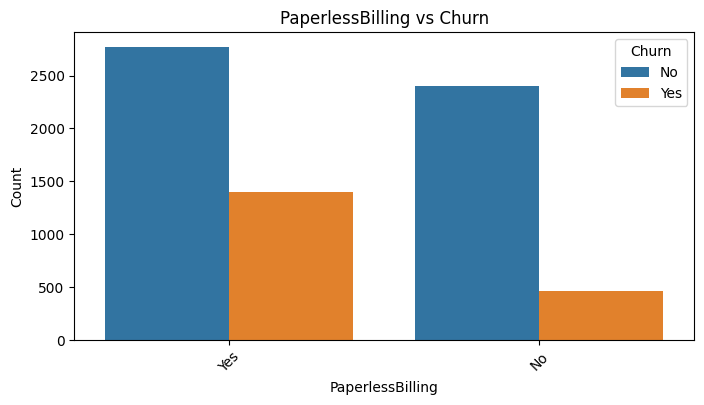

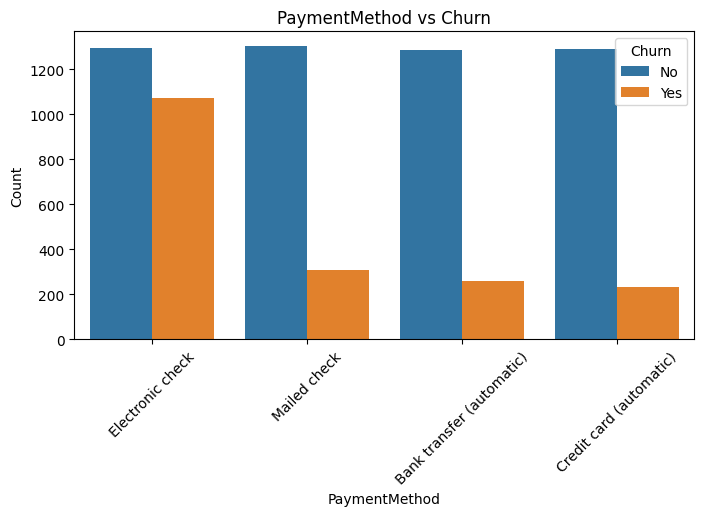

In [31]:
# Plot count plots for categorical variables
categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
]

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()


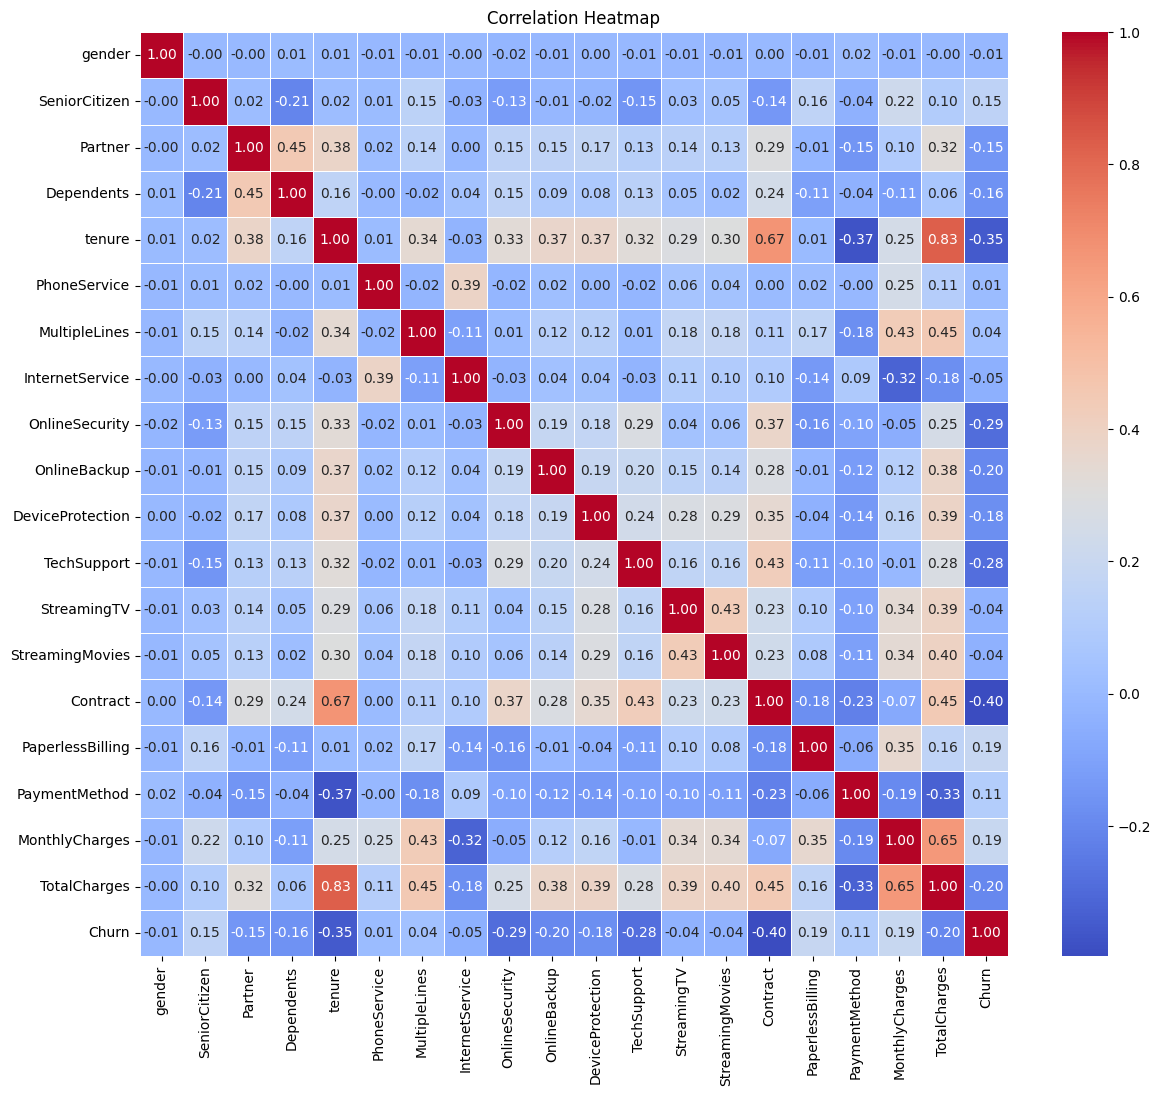

In [32]:
# Encode categorical variables for correlation analysis
data_encoded = data.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column])

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    data_encoded.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
)
plt.title('Correlation Heatmap')
plt.show()


In [33]:
# Use One-Hot Encoding for categorical variables
data_model = pd.get_dummies(data, drop_first=True)

# Display the new dataframe's columns
data_model.columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [34]:
# Standardize the numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

data_model[numerical_features] = scaler.fit_transform(data_model[numerical_features])


In [35]:
# Define features (X) and target variable (y)
X = data_model.drop('Churn_Yes', axis=1)
y = data_model['Churn_Yes']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (4930, 30)
X_test shape: (2113, 30)


In [36]:
# Initialize the models with default parameters
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)


In [37]:
# Train Logistic Regression
lr_model.fit(X_train, y_train)

# Train Decision Tree
dt_model.fit(X_train, y_train)

# Train Random Forest
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


Model: Logistic Regression
Accuracy: 0.8088026502602934
Precision: 0.6666666666666666
Recall: 0.5597147950089126
F1 Score: 0.6085271317829457
ROC AUC Score: 0.8447699018689013

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1552
        True       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



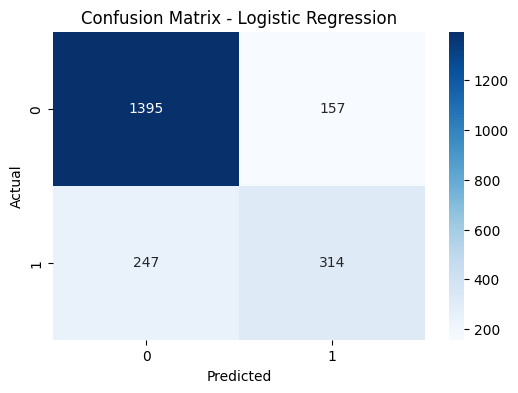

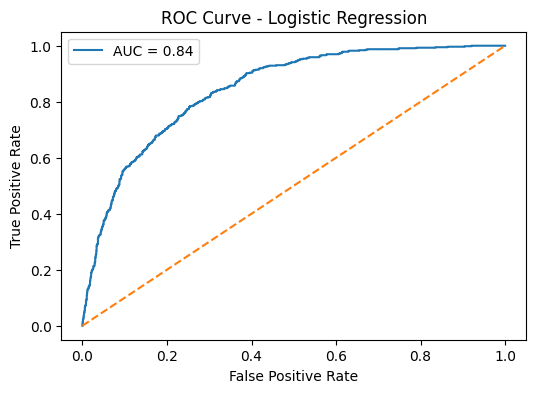

In [39]:
evaluate_model(lr_model, X_test, y_test, 'Logistic Regression')


Model: Decision Tree
Accuracy: 0.7363937529578798
Precision: 0.5034722222222222
Recall: 0.5169340463458111
F1 Score: 0.5101143359718557
ROC AUC Score: 0.6681976680081593

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.82      0.82      1552
        True       0.50      0.52      0.51       561

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.74      0.74      2113



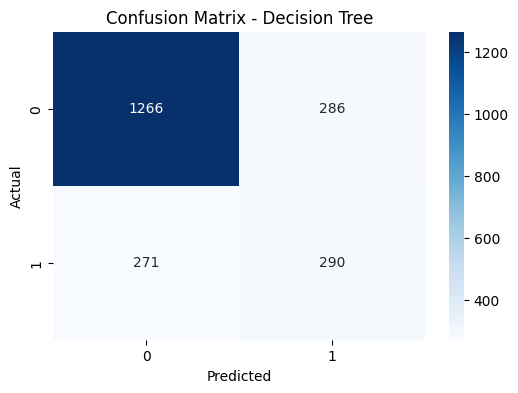

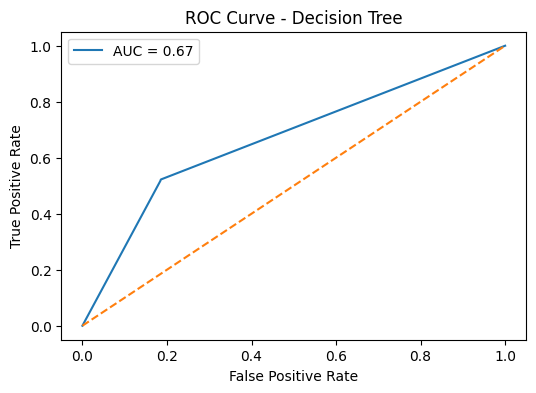

In [40]:
evaluate_model(dt_model, X_test, y_test, 'Decision Tree')


Model: Random Forest
Accuracy: 0.7841930903928065
Precision: 0.6195899772209568
Recall: 0.48484848484848486
F1 Score: 0.544
ROC AUC Score: 0.8222872677655879

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1552
        True       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



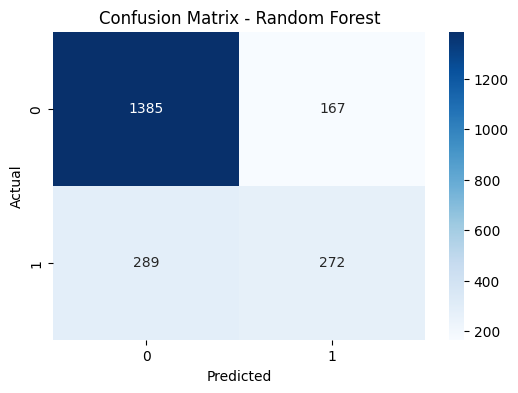

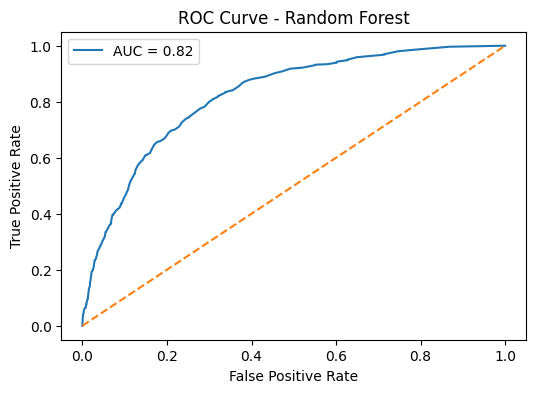

In [41]:
evaluate_model(rf_model, X_test, y_test, 'Random Forest')


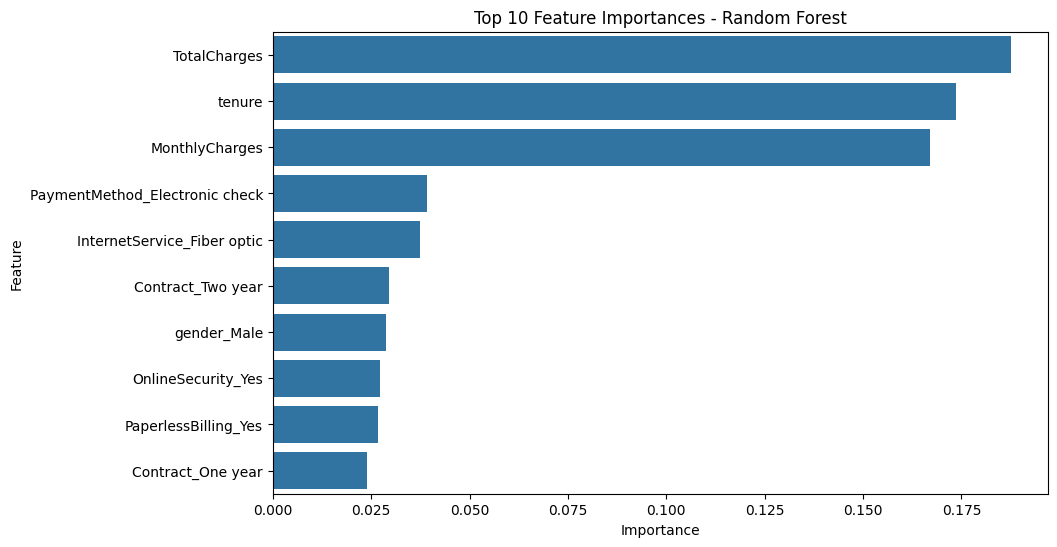

In [42]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort feature importances in descending order
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [43]:
# Assuming 'data' is your original DataFrame and 'rf_model' is your Random Forest model

# Add the predicted probabilities and predicted classes to the DataFrame
data['Churn_Probability'] = rf_model.predict_proba(X)[:, 1]
data['Churn_Predicted'] = rf_model.predict(X)

# Save to CSV
data.to_csv('customer_churn_predictions.csv', index=False)
